### K-Means Clustering Implementation 

In this excercise we will try to cluster iris dataset using K-Means Clustering.

### Import Libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

import plotly as py
import plotly.graph_objs as go
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

C:\Users\XYZ\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [7]:
iris = load_iris()

In [8]:
iris = pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [9]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Scale the data 

In [10]:
scaler = StandardScaler()

In [11]:
iris_scaled = scaler.fit_transform(iris)

### Train the Model 

In [12]:
kmeans = KMeans(n_clusters=3)

In [13]:
kmeans.fit(iris_scaled)

KMeans(n_clusters=3)

In [14]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [15]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [16]:
centroids

array([[-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

In [17]:
Clusted_df = iris
Clusted_df['Labels'] = labels

In [25]:
Clusted_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Let's check Silhouette Score to validate our Clustering Model

In [ ]:
from sklearn.metrics import silhouette_score

In [24]:
# A positive value or close to 1 value indicate a good cluster. A negative or values closer to -1 indicate bad clusters.
silhouette_score(iris,labels)

0.5910709491012561

### Let's do hyperparameter tuning for the value of K 

In [19]:
inertia = []
for n_cluster in range(1 , 20):
    kmeans = KMeans(n_clusters = n_cluster ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan')
    kmeans.fit(iris_scaled)
    inertia.append(kmeans.inertia_)

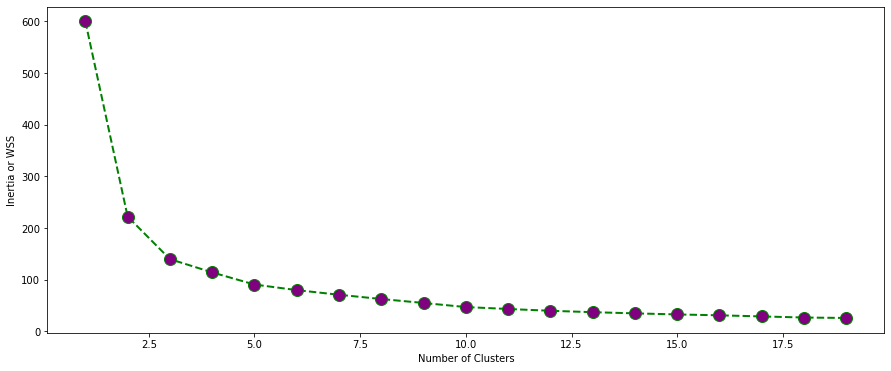

In [20]:
plt.figure(1 , figsize = (15 ,6))
# plt.plot(np.arange(1 , 20) , inertia , 'o')
plt.plot(np.arange(1 , 20) , inertia , color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12,markerfacecolor='purple')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia or WSS')
plt.show()

Elbow curve is also suggesting 3 clusters. So our initial model is good. No need to create another model.